In [1]:
import swiftest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
swiftersim = swiftest.Simulation(param_file=inparfile, codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 3.652e+04
Creating Dataset
Successfully converted 3653 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [4]:
inparfile = 'param.swiftest.in'
swiftestsim = swiftest.Simulation(param_file=inparfile)
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 3653 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [5]:
swiftdiff = swiftestdat - swifterdat

In [6]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [7]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['xhx']**2 + swiftdiff['xhy']**2 + swiftdiff['xhz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vhx']**2 + swiftdiff['vhy']**2 + swiftdiff['vhz']**2)

In [8]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 9]
tpidx = swiftdiff.id.values[swiftdiff.id.values >=9]

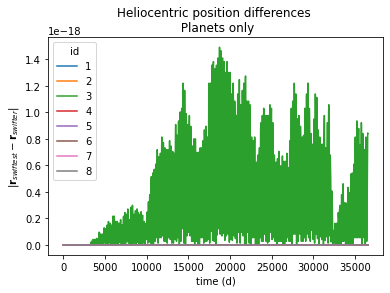

In [9]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-8pl_16tp-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

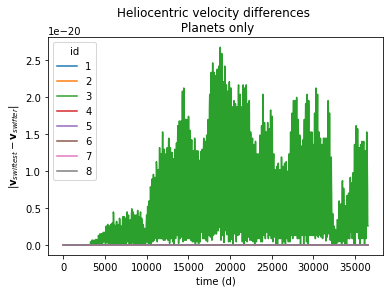

In [10]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-8pl_16tp-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


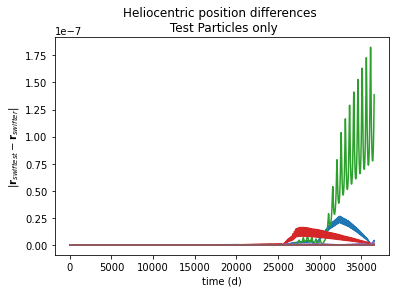

In [11]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-8pl_16tp-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


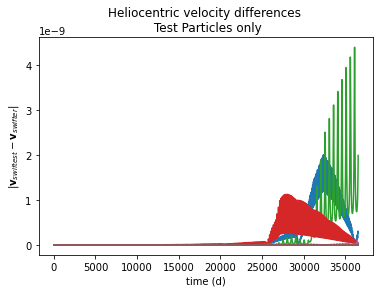

In [12]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-8pl_16tp-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)

In [13]:
swiftdiff = swiftdiff.rename({'time (d)' :'time'})

In [14]:
swiftdiff.sel(id=tpidx).isel(time=5)

<xarray.Dataset>
Dimensions:  (id: 16)
Coordinates:
  * id       (id) int64 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
    time     float64 50.0
Data variables:
    xhx      (id) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    xhy      (id) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    xhz      (id) float64 0.0 0.0 0.0 0.0 -2.033e-20 ... 0.0 0.0 0.0 0.0 0.0
    vhx      (id) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 3.469e-18 0.0
    vhy      (id) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 2.168e-19 0.0
    vhz      (id) float64 0.0 0.0 0.0 0.0 -3.176e-22 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Gmass    (id) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    radius   (id) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    rmag     (id) float64 0.0 0.0 0.0 0.0 2.033e-20 ... 0.0 0.0 0.0 0.0 0.0
    vmag     (id) float64 0.0 0.0 0.0 0.0 3.176e-22 ... 0.0 0.0 3.476e-18 0.0